## Inspect

In [41]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
df = pd.read_json('exps.jsonl', orient='records', lines=True)
df.head()

,commit,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.model.path,params.model.temperature,params.model.top_p,params.model.few_shot_prob,...,params.run,metrics.exact_match,metrics.f1,metrics.supporting.precision,metrics.supporting.recall,metrics.supporting.f1,params.repeat,metrics.citation.precision,metrics.citation.recall,metrics.citation.f1
0,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,619d1b15b96898fc4b8d226eb3b577862a119ecf,cushy-expo,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-Coder-32B-Instruct,0.5,0.95,0,...,1,0.003333,0.067049,0.857667,0.607222,0.687653,NaN,NaN,NaN,NaN
1,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,1263fbbc3f3e1d24533b20f64d96d5d22bbedda1,cedar-tule,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-14B-Instruct,0.7,0.95,1,...,1,0.186667,0.277295,0.861944,0.643333,0.713526,NaN,NaN,NaN,NaN
2,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,899d0102984379466c1a642fb36315024231fd5b,snaky-gyms,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-14B-Instruct,0.3,0.95,0,...,1,0.143333,0.219952,0.632841,0.709444,0.647024,NaN,NaN,NaN,NaN
3,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,e5fa9f945cb4d2bd8dbde6985828848fc23c61cd,compo-arcs,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-32B-Instruct,0.5,0.95,0,...,1,0.146667,0.236616,0.665873,0.736389,0.680518,NaN,NaN,NaN,NaN
4,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,4ff8c7f4d5821cfae0d4381f73a9104b205f5c74,zinky-jota,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-32B-Instruct,0.3,0.95,0,...,1,0.183333,0.260552,0.662040,0.748333,0.684687,NaN,NaN,NaN,NaN


In [43]:
df['params.model.path'].unique()

array(['Qwen/Qwen2.5-Coder-32B-Instruct', 'Qwen/Qwen2.5-14B-Instruct',
       'Qwen/Qwen2.5-32B-Instruct',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-20250427_095331-merged',
       'meta-llama/Llama-3.1-70B-Instruct', 'Qwen/Qwen2.5-1.5B-Instruct',
       'meta-llama/Llama-3.1-8B-Instruct',
       'bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-musique-merged',
       'bdsaglam/Qwen2.5-1.5B-Instruct-ragent-musique',
       'Qwen/Qwen2.5-7B-Instruct',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-400',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-1900',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-2',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-1600',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-musique-2-merged',
       '/home/baris/repos/verifiers/outputs/Llama-3.1

In [44]:
model_name_mapping = {
    "bdsaglam/Qwen2.5-1.5B-Instruct-ragent-musique": "Qwen2.5-1.5B-Instruct-ragent",
    "bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-musique-merged": "Llama-3.1-8B-Instruct-ragent",
    "/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-2": "Llama-3.1-8B-Instruct-ragent-2",
}
def map_model_name(x):
    return model_name_mapping.get(x, x.rsplit('/', 1)[-1]).replace("-Instruct", "")

df['params.model.name'] = df['params.model.path'].map(map_model_name)

In [45]:
df['params.fine_tuning'] = df['params.model.name'].map(lambda x: 'GRPO' if 'ragent' in x else 'None')
df['params.model.base'] = df['params.model.name'].map(lambda x: x.rsplit('-ragent')[0])
# extract the model size from the model name, e.g. Qwen/Qwen2.5-1.5B-Instruct -> 1.5B
df['params.model.size'] = df['params.model.name'].str.extract(r'-([0-9.]+)B').map(float)

In [46]:
target_params = [
    "params.dataset.path",
    "params.model.name",
    "params.model.size",
    # "params.model.few_shot_prob",
    "params.fine_tuning",
    # "params.retriever.name",
    # "params.retriever.top_k",
    # "params.retriever.mode",
    "params.repeat",
]

In [47]:
df.columns

Index(['commit', 'id', 'name', 'params.dataset.path', 'params.dataset.name',
       'params.dataset.split', 'params.model.path', 'params.model.temperature',
       'params.model.top_p', 'params.model.few_shot_prob',
       'params.retriever.name', 'params.retriever.top_k',
       'params.retriever.mode', 'params.run', 'metrics.exact_match',
       'metrics.f1', 'metrics.supporting.precision',
       'metrics.supporting.recall', 'metrics.supporting.f1', 'params.repeat',
       'metrics.citation.precision', 'metrics.citation.recall',
       'metrics.citation.f1', 'params.model.name', 'params.fine_tuning',
       'params.model.base', 'params.model.size'],
      dtype='object')

In [48]:
leaderboard_df = df[
    [
        "name",
        *target_params,
        "metrics.exact_match",
        "metrics.f1",
        "metrics.supporting.f1",
        "metrics.supporting.recall",
        "metrics.supporting.precision",
    ]
].sort_values(by="metrics.f1", ascending=False)

mask = df['params.dataset.path'] == 'bdsaglam/musique-mini'
leaderboard_df.loc[mask]

,name,params.dataset.path,params.model.name,params.model.size,params.fine_tuning,params.repeat,metrics.exact_match,metrics.f1,metrics.supporting.f1,metrics.supporting.recall,metrics.supporting.precision
213,chary-hose,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,GRPO,NaN,0.396667,0.506167,0.794415,0.772222,0.837278
239,unfit-cool,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,GRPO,5.0,0.406667,0.499275,0.780786,0.746667,0.853056
241,natal-tass,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,GRPO,5.0,0.386667,0.482194,0.694437,0.638333,0.805556
217,banal-plow,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,GRPO,NaN,0.380000,0.480336,0.772122,0.743611,0.827333
175,ionic-joey,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,GRPO,NaN,0.390000,0.478288,0.765526,0.716389,0.859444
...,...,...,...,...,...,...,...,...,...,...,...
103,world-conk,bdsaglam/musique-mini,Qwen2.5-1.5B,1.5,None,NaN,0.000000,0.001846,0.511706,0.468889,0.599889
223,purer-coth,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,GRPO,NaN,0.000000,0.000000,0.004444,0.003333,0.006667
222,dorty-bael,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,GRPO,NaN,0.000000,0.000000,0.003333,0.003333,0.003333
211,pursy-bots,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,GRPO,NaN,0.000000,0.000000,0.010222,0.011111,0.010000


In [49]:
leaderboard_df['params.repeat'].unique()

array([nan,  5.,  1.])

In [50]:
def scatter_plot(df):
    # Create publication-quality plot comparing model size vs F1 score
    plt.style.use("seaborn-v0_8")  # Use the updated seaborn style name
    plt.figure(figsize=(12, 6))

    # Customize appearance
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xlabel("Model Size (Billion Parameters)", fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.title("Model Performance vs Size", fontsize=14, pad=15)

    # Add fine-tuning type as color
    colors = {"None": "C0", "GRPO": "C1"}
    for fine_tuning in colors:
        mask = df["params.fine_tuning"] == fine_tuning

        # Plot points
        plt.scatter(
            df[mask]["params.model.size"],
            df[mask]["metrics.f1"],
            label=fine_tuning if fine_tuning != "None" else "Base Model",
            alpha=0.7,
            s=100,
            c=colors[fine_tuning],
        )

        # Add model names as annotations
        for idx in df[mask].index:
            model_name = df.loc[idx, "params.model.base"] + "-" + df.loc[idx, "params.retriever.name"]
            plt.annotate(
                model_name,
                (df.loc[idx, "params.model.size"], df.loc[idx, "metrics.f1"]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=8,
            )

    plt.legend(title="Fine-tuning Type", title_fontsize=10)

    # Adjust layout and style
    plt.tight_layout()
    plt.show()


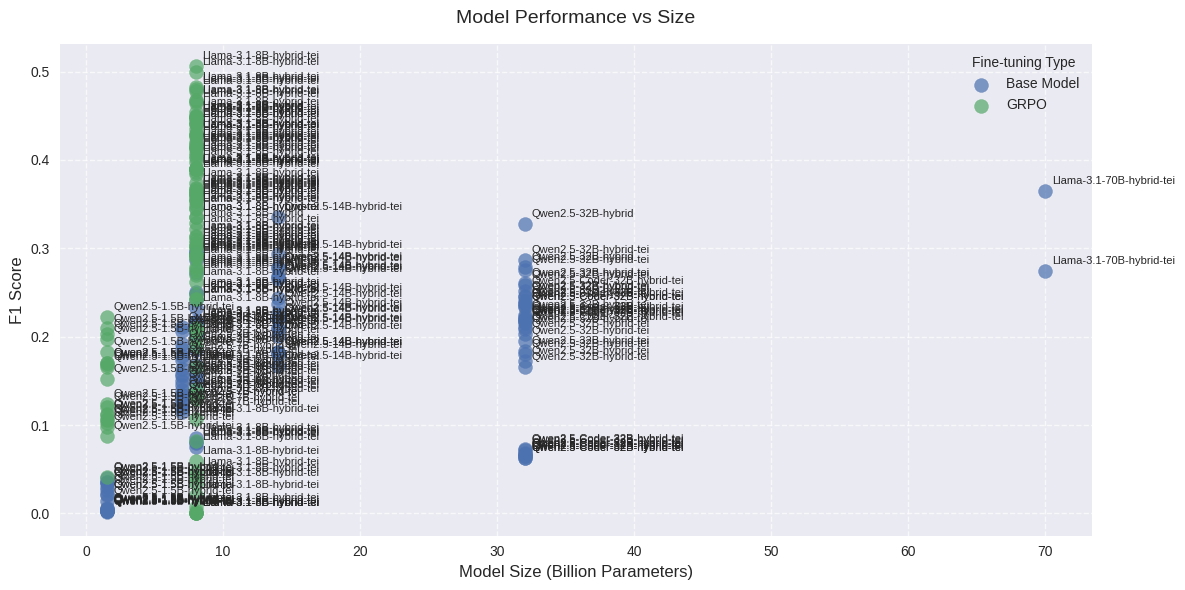

In [51]:
mask = df['params.dataset.path'] == 'bdsaglam/musique-mini'
scatter_plot(df[mask])

In [52]:
# mask = df['params.dataset.path'] == 'bdsaglam/hotpotqa-distractor'
# scatter_plot(df[mask])

In [53]:
def plot_model_size_vs_f1(df):
    """Create a publication-quality scatter plot comparing model size vs F1 score."""
    # Set style and figure size
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

    # Customize appearance
    ax.grid(True, linestyle="--", alpha=0.4, zorder=0)
    ax.set_xlabel("Model Size (Billion Parameters)", fontsize=12, fontweight="bold")
    ax.set_ylabel("F1 Score", fontsize=12, fontweight="bold")
    ax.set_title("Language Model Performance by Parameter Count", fontsize=14, pad=15, fontweight="bold")

    # Set x-axis to logarithmic scale
    ax.set_xscale('log')

    # Define colors and markers
    colors = {"None": "#2E86C1", "GRPO": "#E74C3C"}
    markers = {"None": "o", "GRPO": "^"}

    for fine_tuning in ["None", "GRPO"]:
        mask = df["params.fine_tuning"] == fine_tuning
        label = "Base Model" if fine_tuning == "None" else "GRPO Fine-tuned"

        # Plot points
        ax.scatter(
            df[mask]["params.model.size"],
            df[mask]["metrics.f1"],
            label=label,
            alpha=0.9,
            s=120,
            c=colors[fine_tuning],
            marker=markers[fine_tuning],
            edgecolor="white",
            linewidth=1,
            zorder=2,
        )

        # Add model name annotations
        for idx in df[mask].index:
            label = df.loc[idx, "params.model.base"].replace("Instruct", "").strip("-")
            plt.annotate(
                label,
                (df.loc[idx, "params.model.size"], df.loc[idx, "metrics.f1"]),
                xytext=(7, 7),
                textcoords="offset points",
                fontsize=9,
                alpha=0.8,
                bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1),
            )

    # Customize legend
    ax.legend(title="Model Type", title_fontsize=10, fontsize=10, framealpha=0.9, edgecolor="none", loc="upper left")

    # Set axis limits with padding
    ax.set_xlim(left=1)  # Start at 1B parameters since using log scale
    ax.set_ylim(bottom=0)

    # Format axis ticks
    ax.tick_params(axis="both", which="major", labelsize=10)

    plt.tight_layout()
    plt.show()


In [54]:
def aggregate_best_models(df, by: list[str] = ["params.model.base", "params.fine_tuning"]):
    # Group by model base and fine tuning method
    grouped = df.groupby(by)

    # Get columns of interest
    columns = [
        "params.model.base",
        "params.model.size",
        "params.fine_tuning",
        "params.retriever.name",
        "params.retriever.top_k",
        "params.retriever.mode",
        "metrics.exact_match",
        "metrics.f1",
        "metrics.supporting.recall",
        "metrics.supporting.f1",
    ]

    # For each group, select the row with highest F1 score
    return (
        grouped.apply(lambda x: x.loc[x["metrics.f1"].idxmax()])[columns]
        .reset_index(drop=True)
        .sort_values(by="metrics.f1", ascending=False)
    )

/tmp/ipykernel_4061644/2309424635.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(lambda x: x.loc[x["metrics.f1"].idxmax()])[columns]


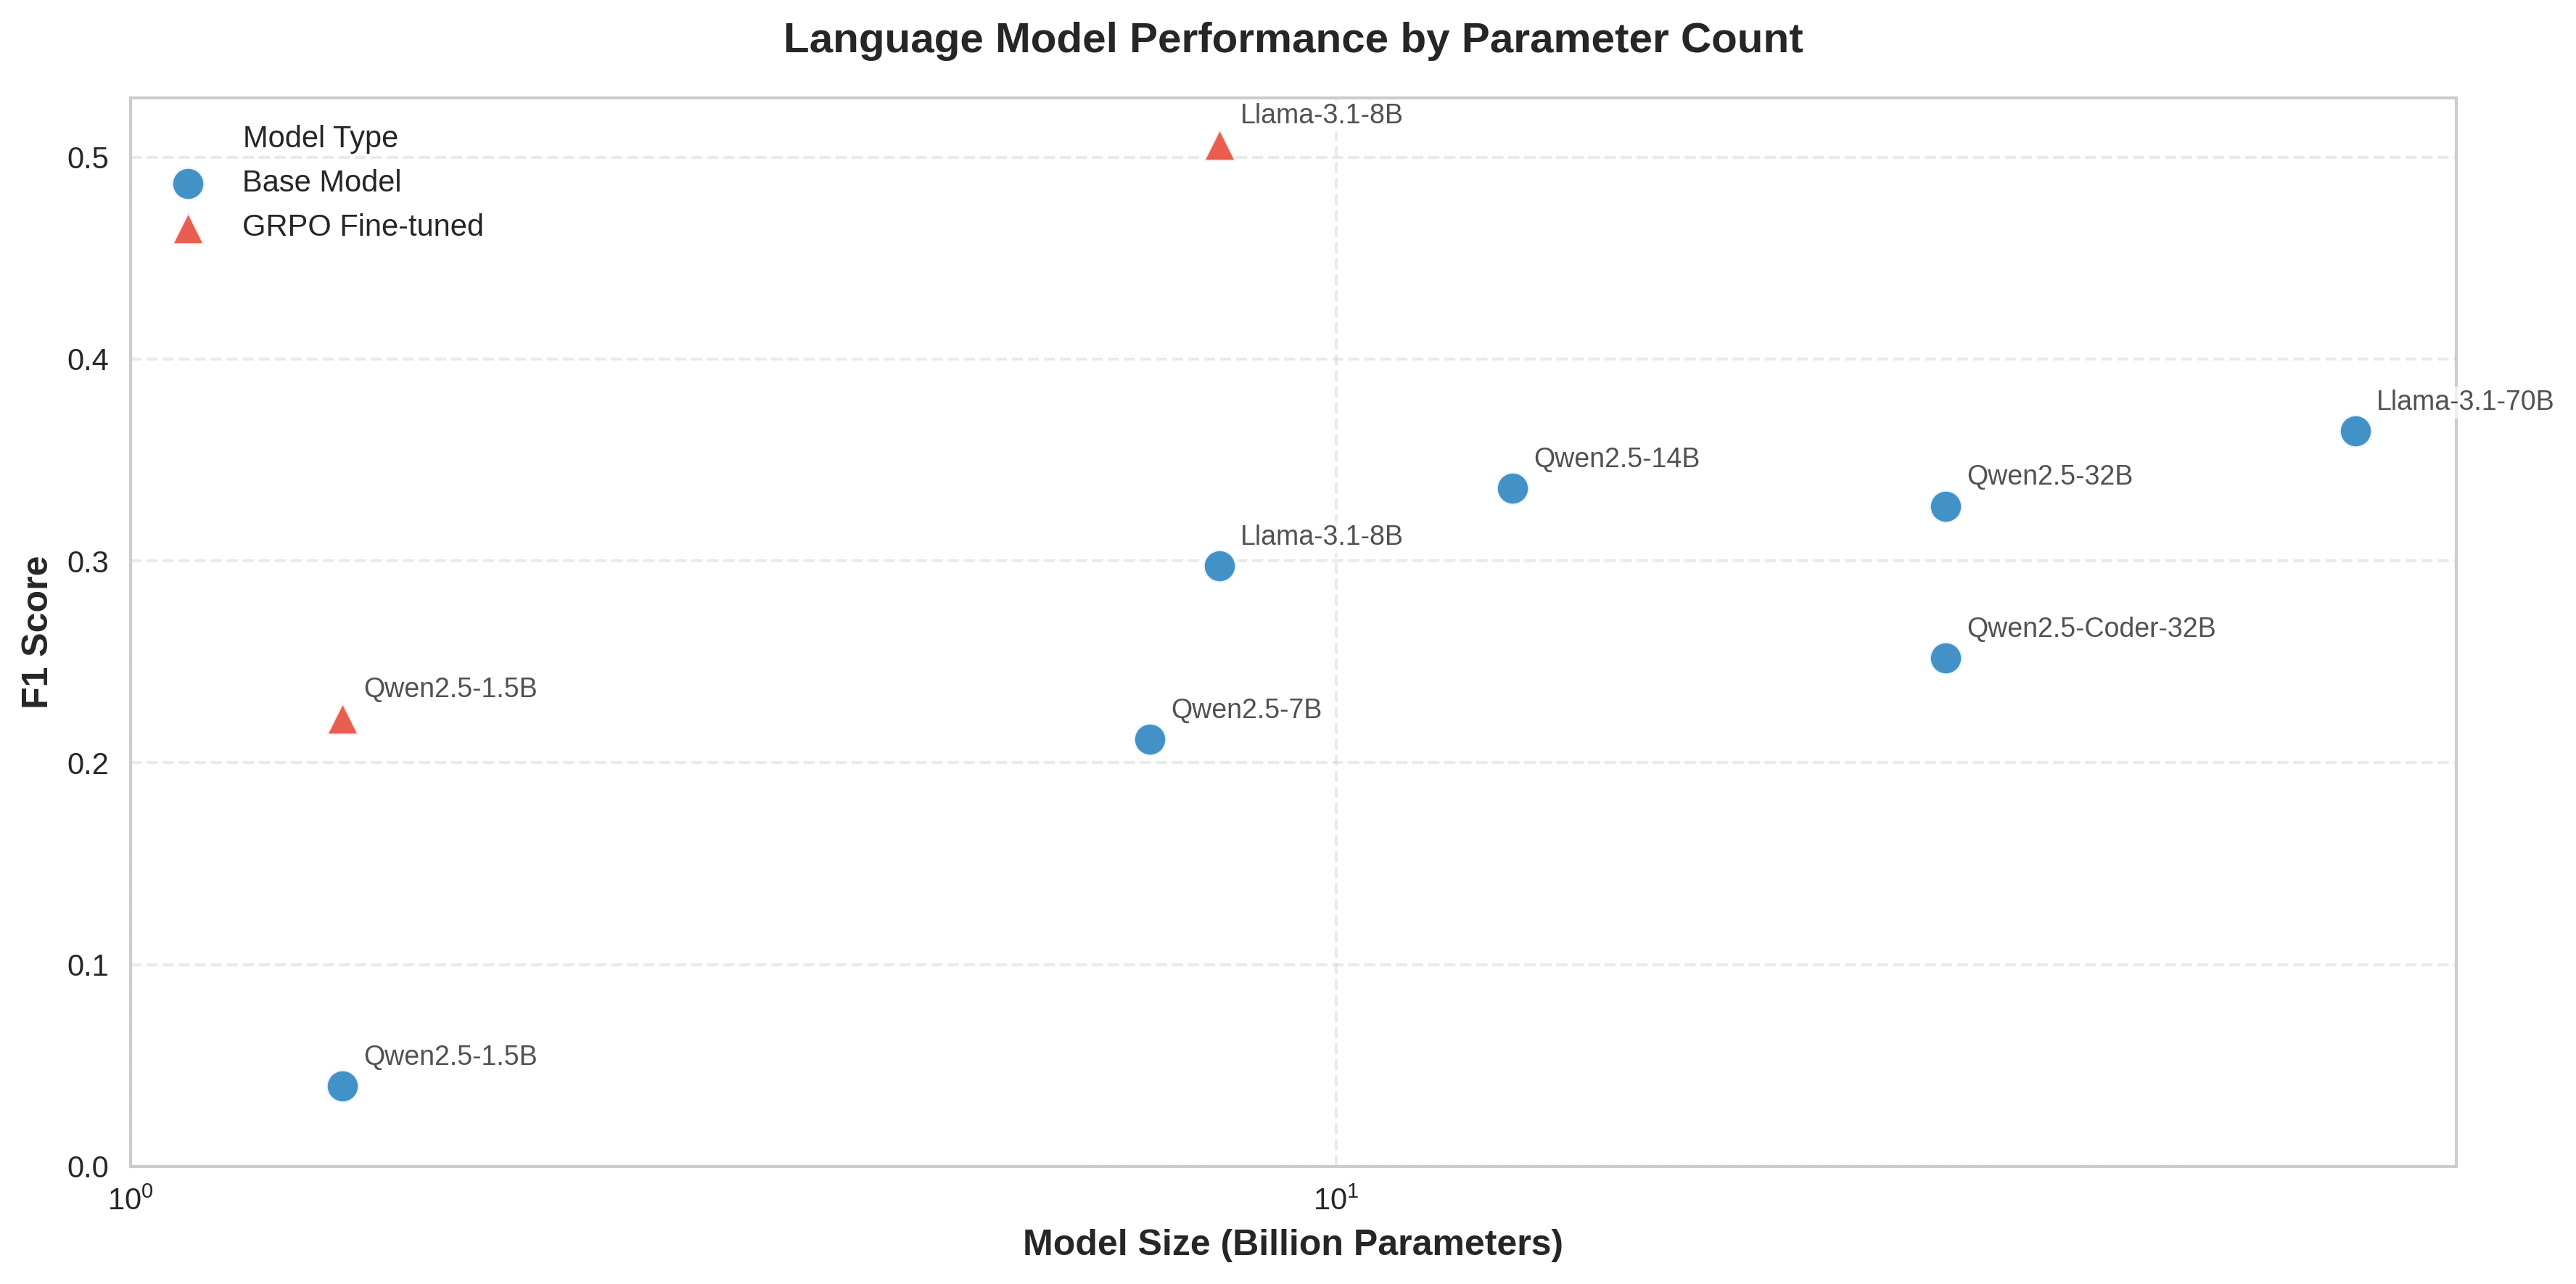

,params.model.base,params.model.size,params.fine_tuning,params.retriever.name,params.retriever.top_k,params.retriever.mode,metrics.exact_match,metrics.f1,metrics.supporting.recall,metrics.supporting.f1
1,Llama-3.1-8B,8.0,GRPO,hybrid-tei,1,new,0.396667,0.506167,0.772222,0.794415
0,Llama-3.1-70B,70.0,None,hybrid-tei,2,all,0.280000,0.364412,0.658889,0.725246
5,Qwen2.5-14B,14.0,None,hybrid-tei,1,new,0.266667,0.335930,0.672500,0.660807
6,Qwen2.5-32B,32.0,None,hybrid,1,new,0.250000,0.327122,0.700556,0.678796
2,Llama-3.1-8B,8.0,None,hybrid-tei,1,all,0.233333,0.297503,0.689444,0.750664
8,Qwen2.5-Coder-32B,32.0,None,hybrid-tei,2,all,0.190000,0.251886,0.679722,0.627623
3,Qwen2.5-1.5B,1.5,GRPO,hybrid-tei,1,all,0.163333,0.221953,0.545556,0.642222
7,Qwen2.5-7B,7.0,None,hybrid-tei,2,all,0.123333,0.211458,0.563611,0.544051
4,Qwen2.5-1.5B,1.5,None,hybrid-tei,3,all,0.026667,0.039673,0.507222,0.424266


In [55]:
mask = df['params.dataset.path'] == 'bdsaglam/musique-mini'
best_df = aggregate_best_models(df.loc[mask])
plot_model_size_vs_f1(best_df)
display(best_df)

/tmp/ipykernel_4061644/2309424635.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(lambda x: x.loc[x["metrics.f1"].idxmax()])[columns]


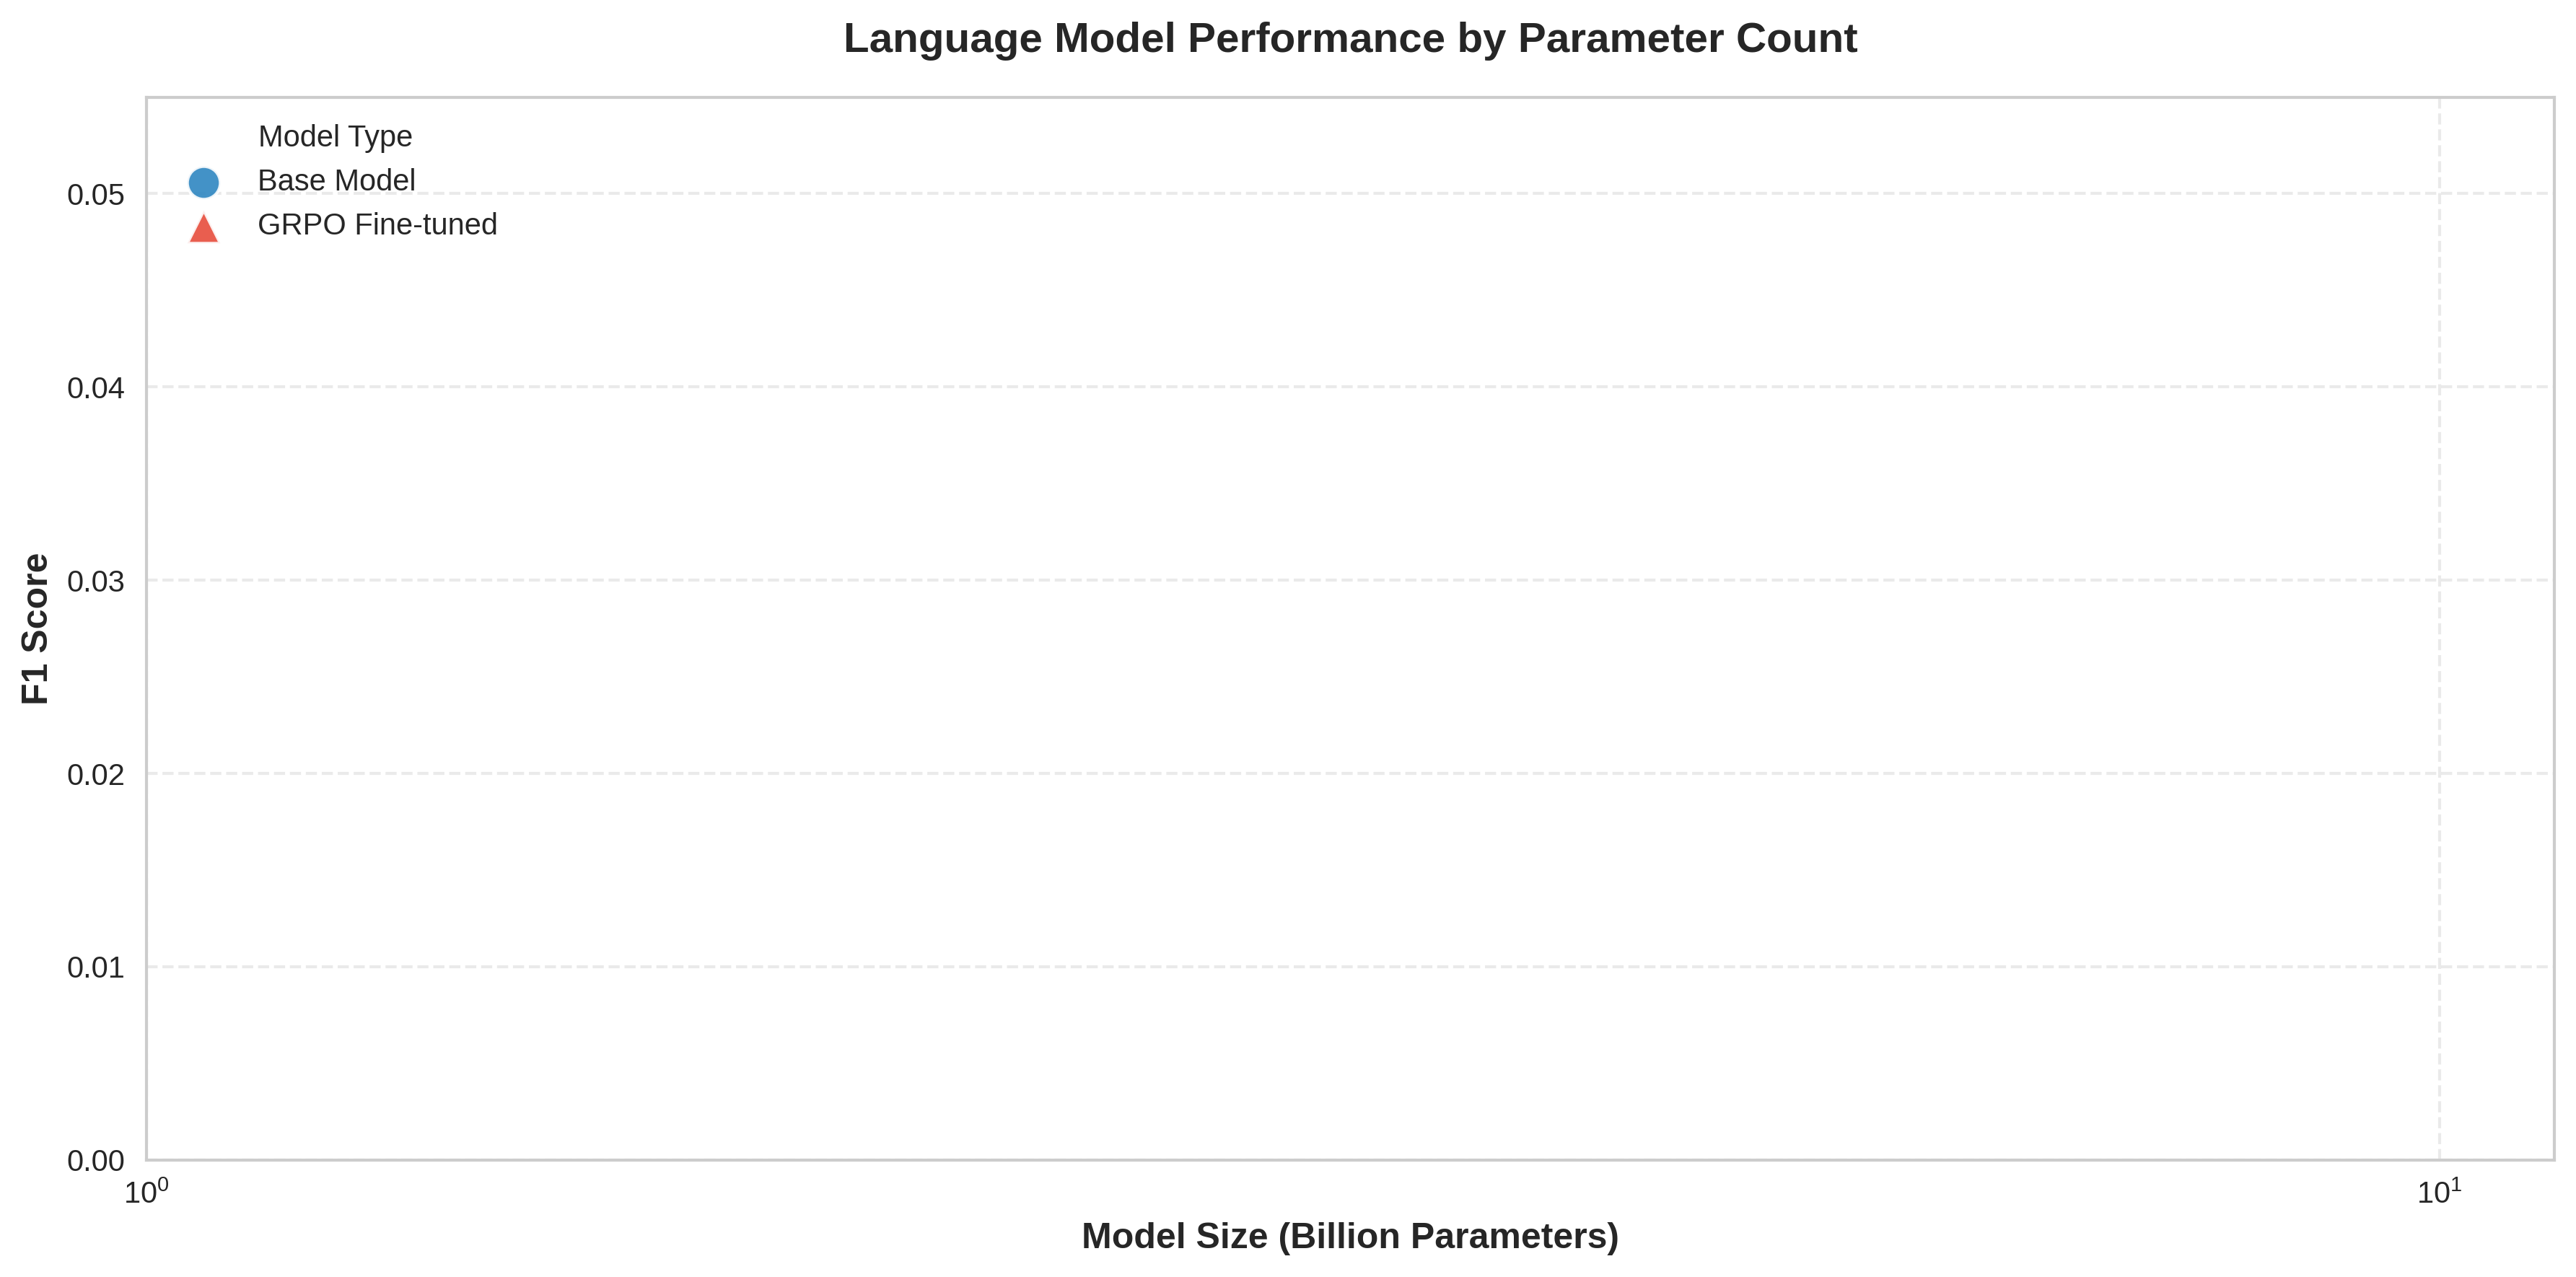

,params.model.base,params.model.size,params.fine_tuning,params.retriever.name,params.retriever.top_k,params.retriever.mode,metrics.exact_match,metrics.f1,metrics.supporting.recall,metrics.supporting.f1


In [56]:
mask = df['params.dataset.path'] == 'bdsaglam/hotpotqa-distractor'
best_df = aggregate_best_models(df.loc[mask])
plot_model_size_vs_f1(best_df)
display(best_df)

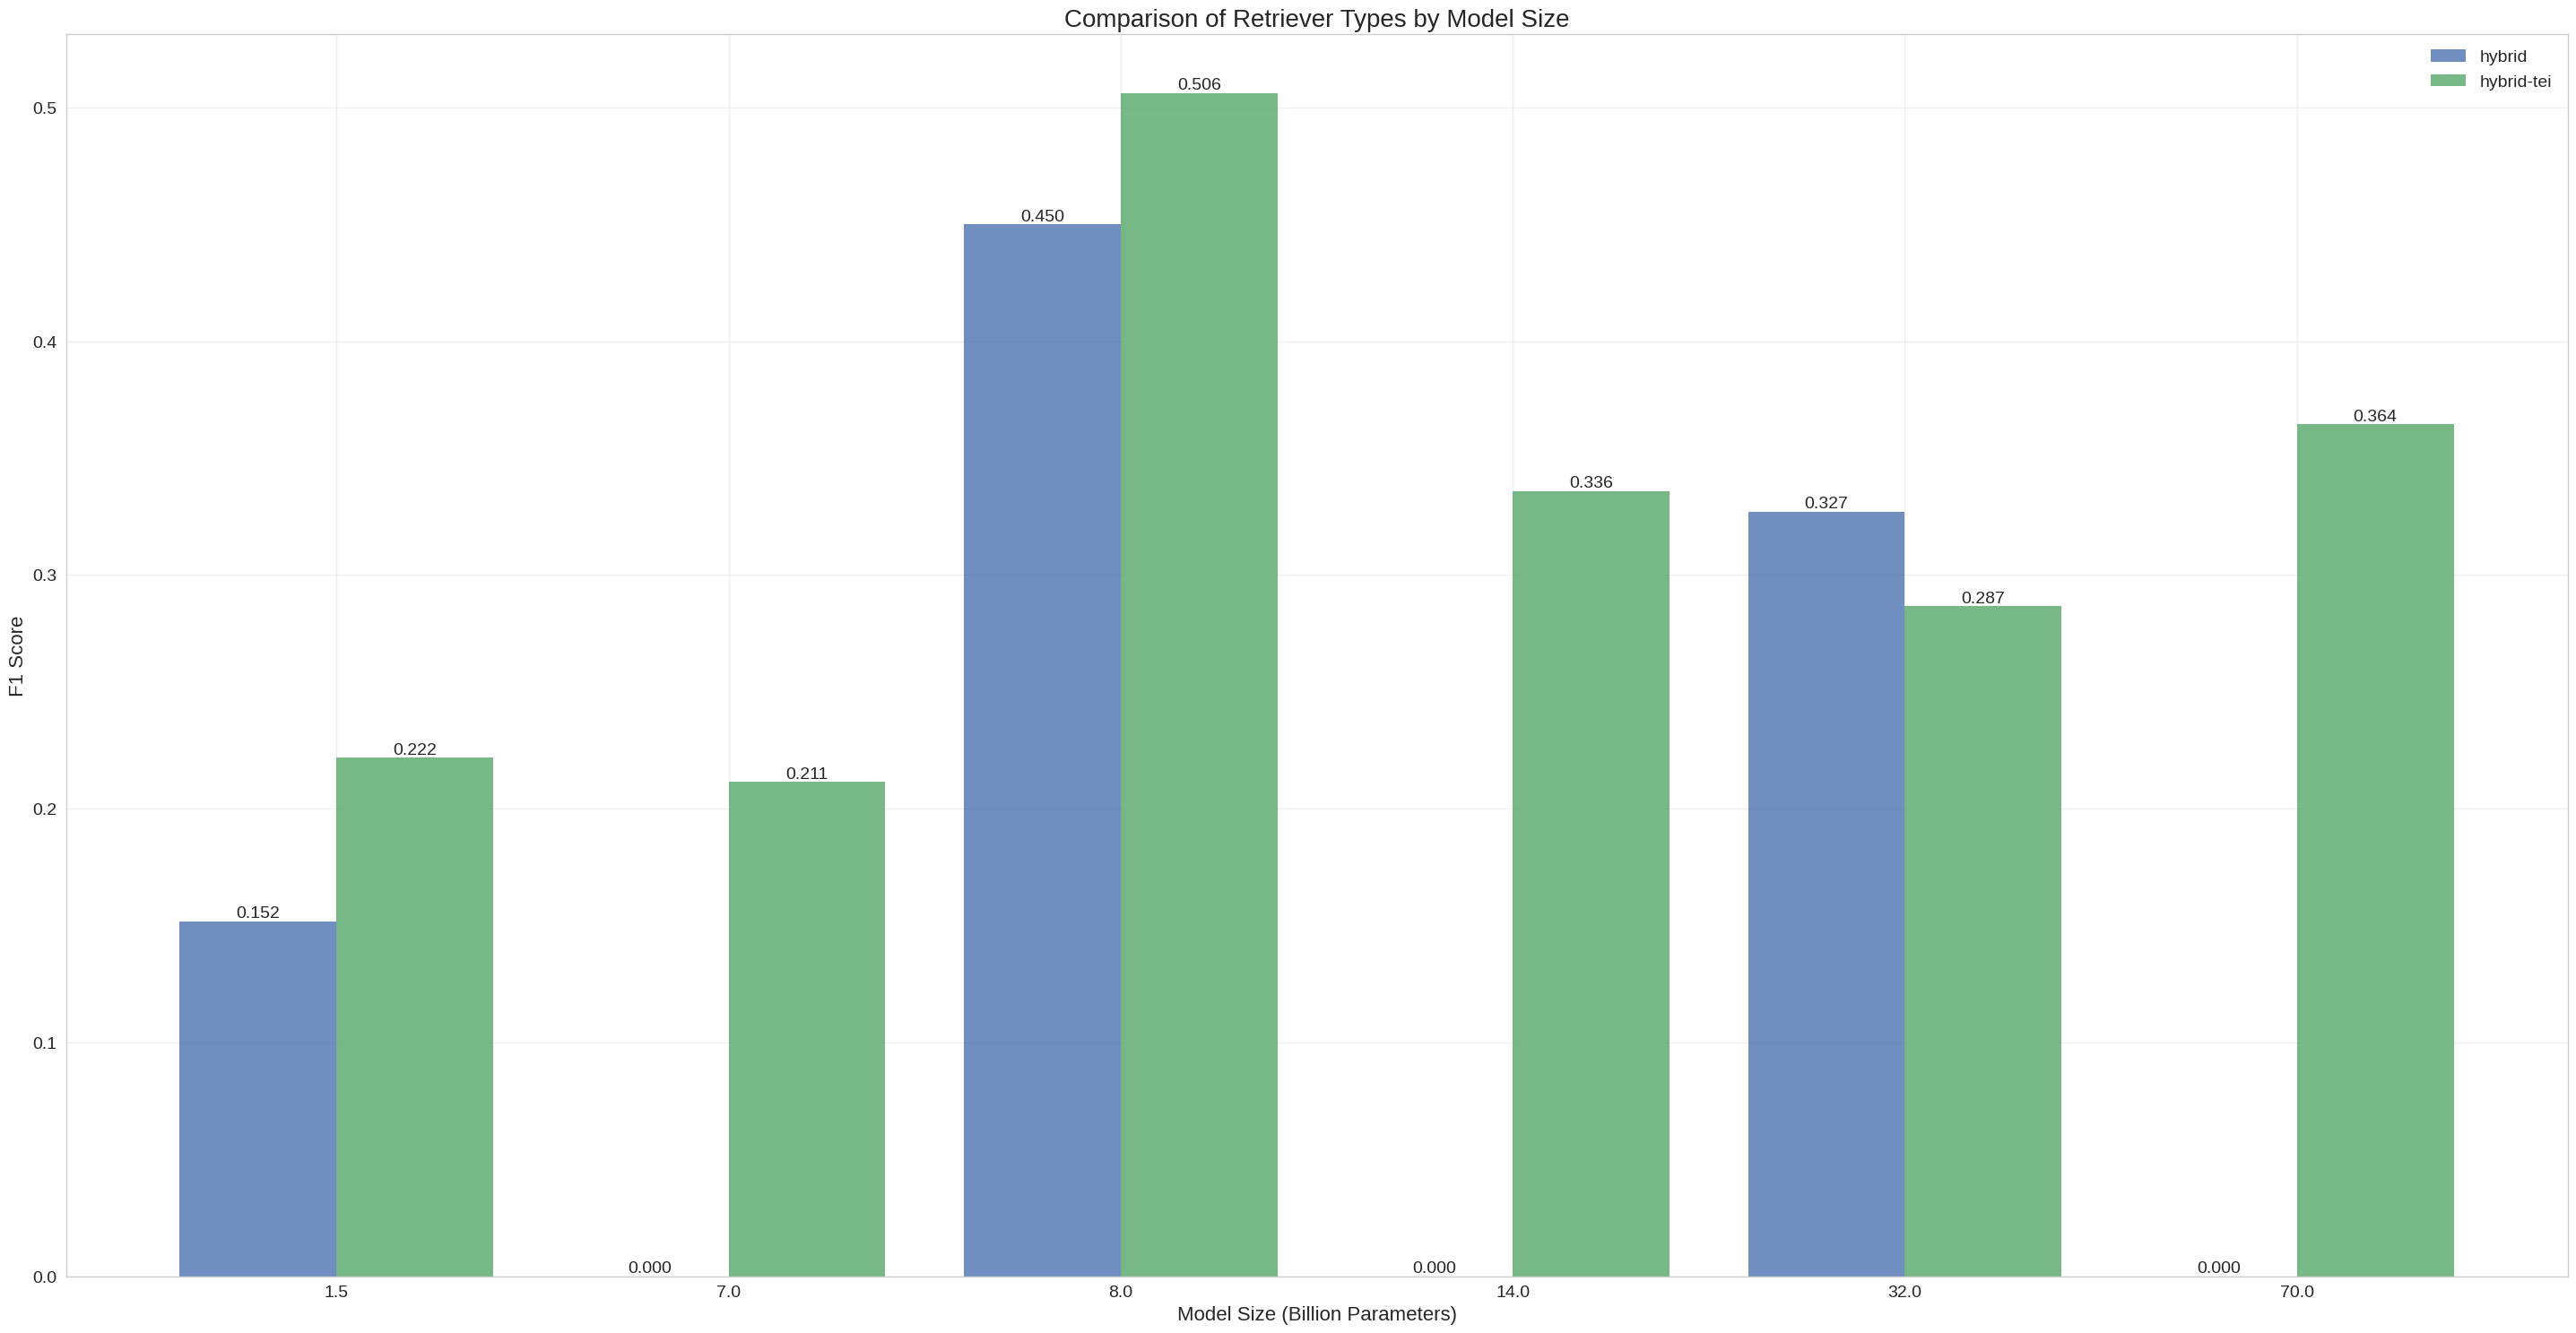

In [57]:
import numpy as np


def plot_retriever_comparison(df):
    plt.figure(figsize=(36, 18))

    # Group by model size and retriever type
    grouped = df.groupby(["params.model.size", "params.retriever.name"])

    # Get best results for each group
    retriever_df = grouped.agg({"metrics.f1": "max"}).reset_index()

    # Get unique model sizes and retriever types
    model_sizes = sorted(df["params.model.size"].unique())
    retriever_types = sorted(df["params.retriever.name"].unique())

    # Set up bar positions
    x = np.arange(len(model_sizes))
    width = 0.8 / len(retriever_types)

    # Create grouped bar plot
    for i, retriever in enumerate(retriever_types):
        data = retriever_df[retriever_df["params.retriever.name"] == retriever]
        heights = [
            data[data["params.model.size"] == size]["metrics.f1"].values[0]
            if len(data[data["params.model.size"] == size]) > 0
            else 0
            for size in model_sizes
        ]

        pos = x + i * width - (len(retriever_types) - 1) * width / 2
        bars = plt.bar(pos, heights, width, label=retriever, alpha=0.8)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.3f}", ha="center", va="bottom", fontsize=14)

    # Customize plot
    plt.title("Comparison of Retriever Types by Model Size", fontsize=20)
    plt.xlabel("Model Size (Billion Parameters)", fontsize=16)
    plt.ylabel("F1 Score", fontsize=16)
    plt.xticks(x, model_sizes, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

mask = df['params.dataset.path'] == 'bdsaglam/musique-mini'
plot_retriever_comparison(df.loc[mask])


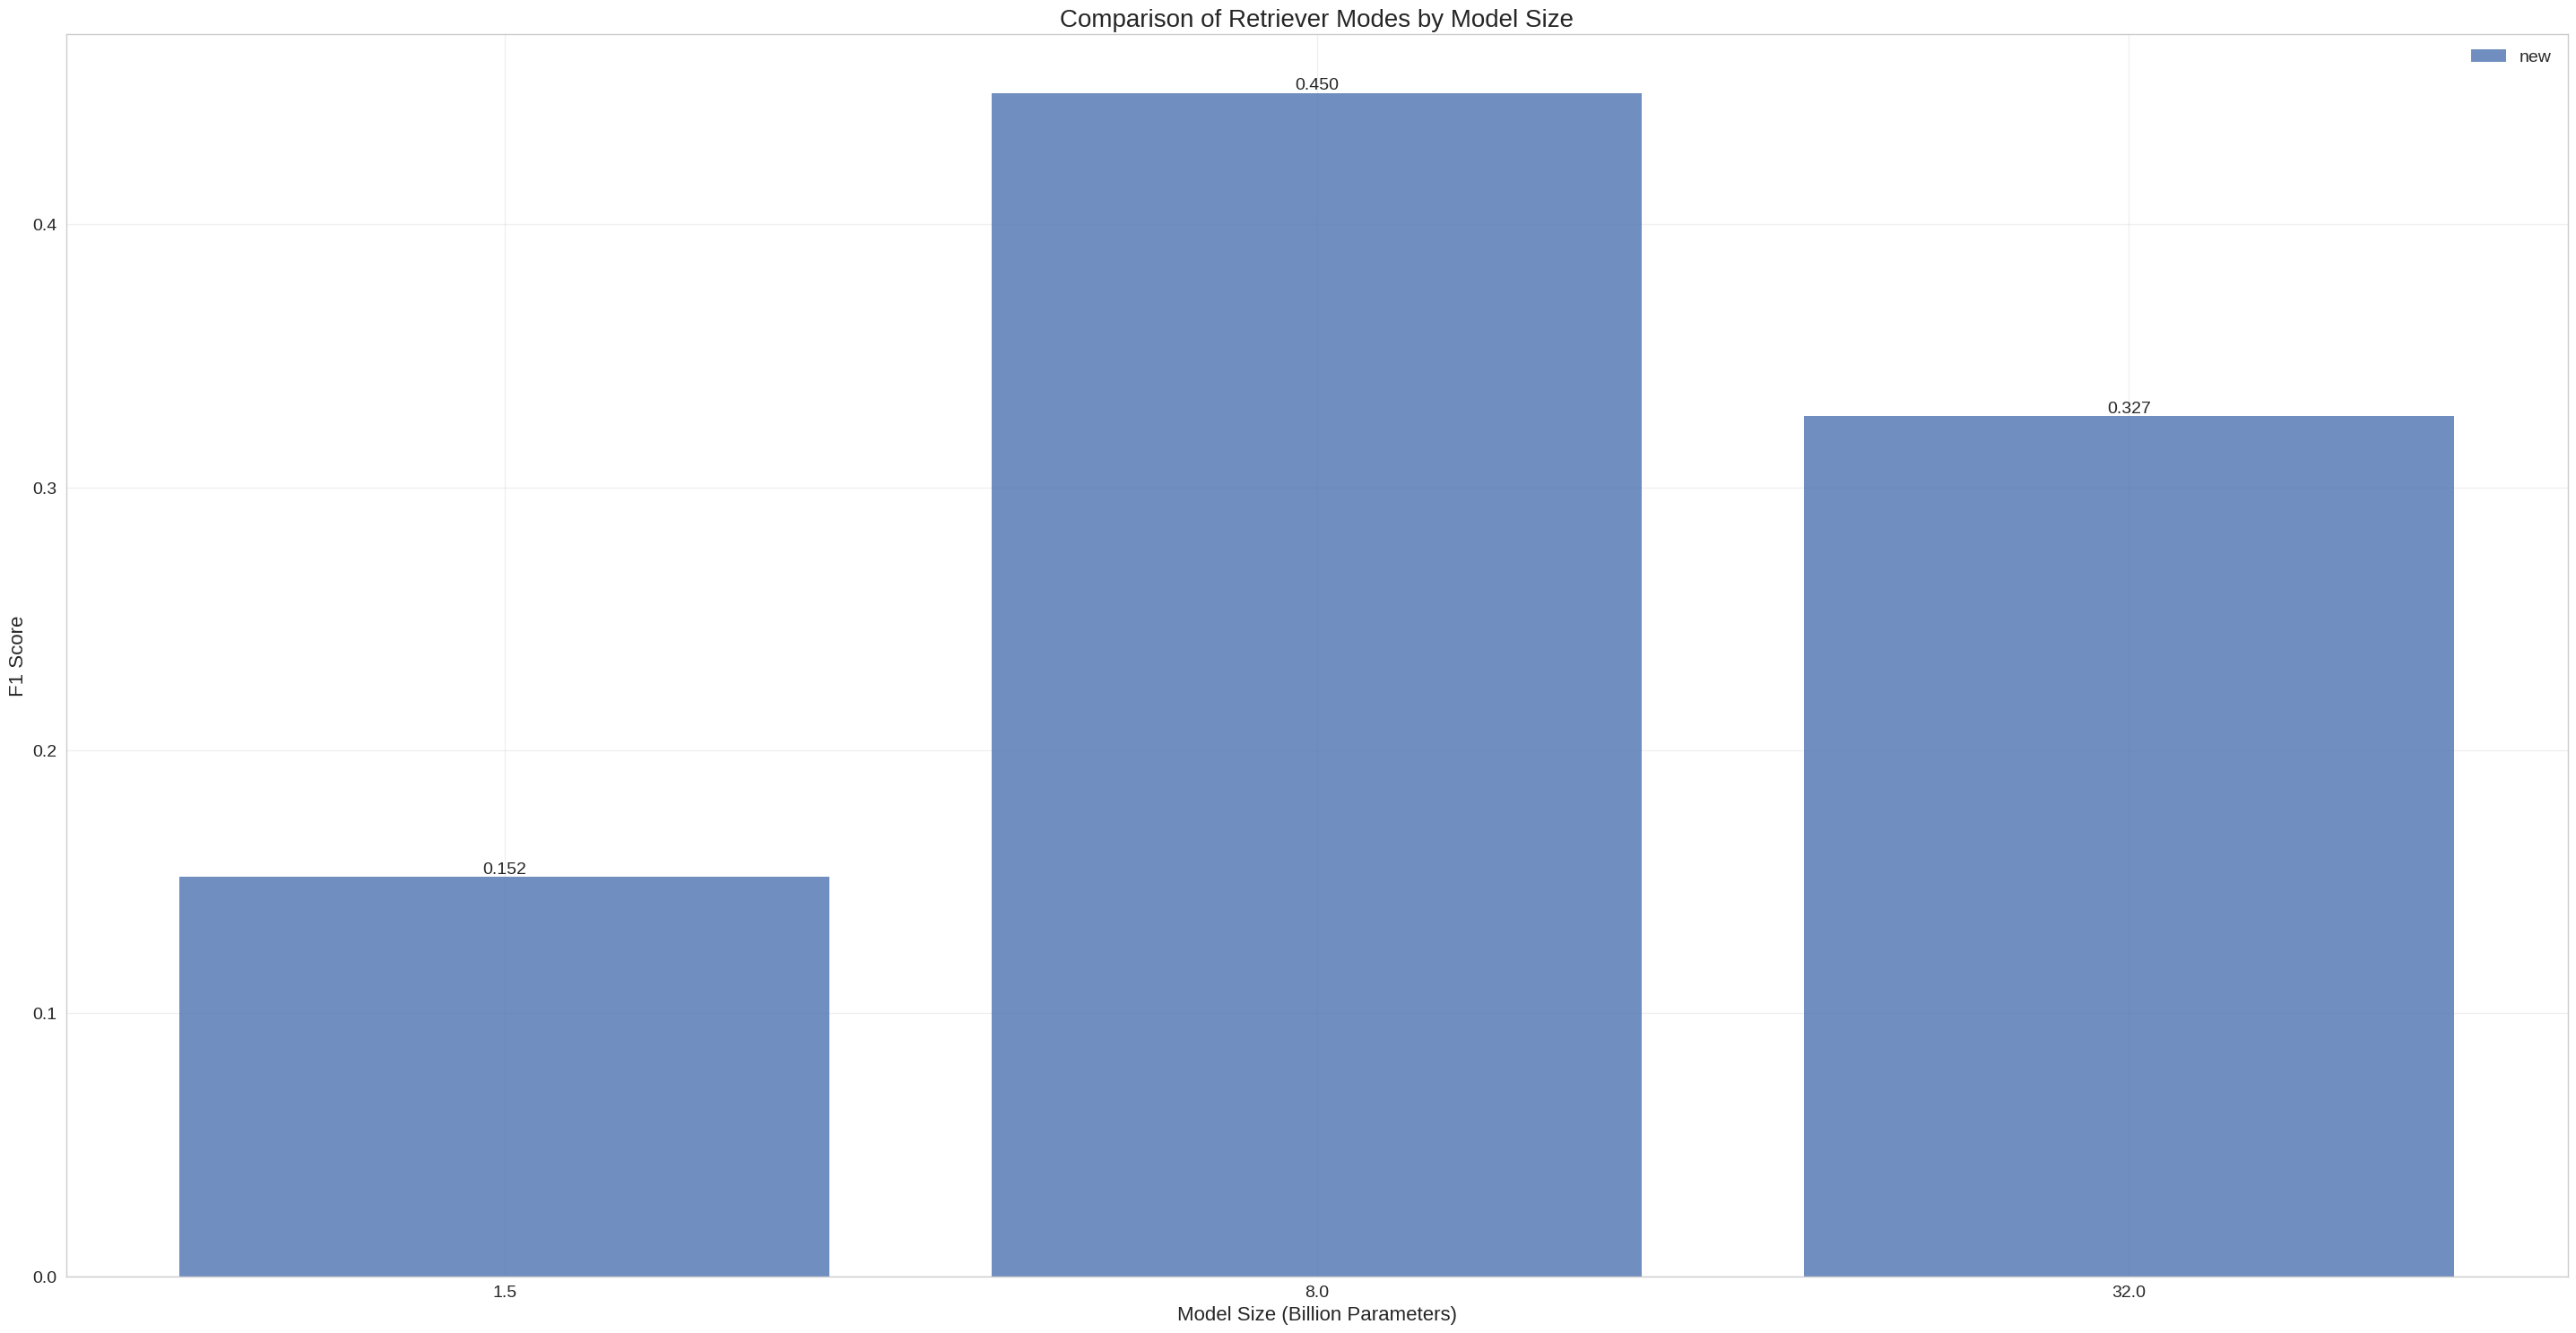

In [58]:
import numpy as np


def plot_retriever_mode_comparison(df):
    plt.figure(figsize=(36, 18))

    # Group by model size and retriever type
    grouped = df.groupby(["params.model.size", "params.retriever.mode"])

    # Get best results for each group
    retriever_df = grouped.agg({"metrics.f1": "max"}).reset_index()

    # Get unique model sizes and retriever types
    model_sizes = sorted(df["params.model.size"].unique())
    retriever_types = sorted(df["params.retriever.mode"].unique())

    # Set up bar positions
    x = np.arange(len(model_sizes))
    width = 0.8 / len(retriever_types)

    # Create grouped bar plot
    for i, retriever in enumerate(retriever_types):
        data = retriever_df[retriever_df["params.retriever.mode"] == retriever]
        heights = [
            data[data["params.model.size"] == size]["metrics.f1"].values[0]
            if len(data[data["params.model.size"] == size]) > 0
            else 0
            for size in model_sizes
        ]

        pos = x + i * width - (len(retriever_types) - 1) * width / 2
        bars = plt.bar(pos, heights, width, label=retriever, alpha=0.8)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.3f}", ha="center", va="bottom", fontsize=14)

    # Customize plot
    plt.title("Comparison of Retriever Modes by Model Size", fontsize=20)
    plt.xlabel("Model Size (Billion Parameters)", fontsize=16)
    plt.ylabel("F1 Score", fontsize=16)
    plt.xticks(x, model_sizes, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

mask = (df['params.dataset.path'] == 'bdsaglam/musique-mini') & (df['params.retriever.name'] == 'hybrid')
plot_retriever_mode_comparison(df.loc[mask])


In [59]:
mask = (df['params.retriever.mode'] == 'new') & (df['params.dataset.path'] == 'bdsaglam/musique-mini')
_df_1 = df.loc[mask, target_params + ['metrics.f1']].sort_values(by='metrics.f1', ascending=False)
_df_1

,params.dataset.path,params.model.name,params.model.size,params.fine_tuning,params.repeat,metrics.f1
213,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,GRPO,NaN,0.506167
239,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,GRPO,5.0,0.499275
241,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,GRPO,5.0,0.482194
217,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,GRPO,NaN,0.480336
167,bdsaglam/musique-mini,Llama-3.1-8B-ragent-20250421_000014-400,8.0,GRPO,NaN,0.468249
...,...,...,...,...,...,...
238,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,GRPO,NaN,0.002667
223,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,GRPO,NaN,0.000000
211,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,GRPO,NaN,0.000000
210,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250520_080809-merged,8.0,GRPO,NaN,0.000000


In [60]:
mask = (df['params.retriever.mode'] == 'all') & (df['params.dataset.path'] == 'bdsaglam/musique-mini')
_df_2 = df.loc[mask, target_params + ['metrics.f1']].sort_values(by='metrics.f1', ascending=False)
_df_2

,params.dataset.path,params.model.name,params.model.size,params.fine_tuning,params.repeat,metrics.f1
175,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,GRPO,NaN,0.478288
74,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,GRPO,NaN,0.466928
65,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,GRPO,NaN,0.463979
170,bdsaglam/musique-mini,Llama-3.1-8B-ragent-20250421_000014-400,8.0,GRPO,NaN,0.454198
187,bdsaglam/musique-mini,Llama-3.1-8B-ragent-20250421_000014-400,8.0,GRPO,NaN,0.446636
...,...,...,...,...,...,...
76,bdsaglam/musique-mini,Qwen2.5-1.5B,1.5,None,NaN,0.003143
93,bdsaglam/musique-mini,Qwen2.5-1.5B,1.5,None,NaN,0.002273
99,bdsaglam/musique-mini,Qwen2.5-1.5B,1.5,None,NaN,0.002273
63,bdsaglam/musique-mini,Qwen2.5-1.5B,1.5,None,NaN,0.002222
